Aim: Implement Linear Regression on the given Dataset and apply Regularization to overcome overfitting
in the model

1. Perform Linear Regression on Dataset 1 by computing cost function and gradient descent from scratch.


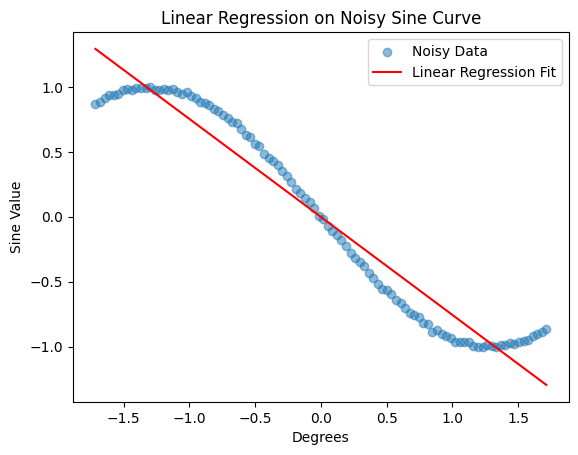

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd
np.random.seed(42)
x = np.linspace(60, 300, 100)
x_rad = np.radians(x)
y_true = np.sin(x_rad)
y_noisy = y_true + np.random.normal(0, 0.01, size=x.shape)
x = (x - np.mean(x)) / np.std(x)
class LinearRegressionScratch:
 def __init__(self, learning_rate=0.1, epochs=1000):
  self.learning_rate = learning_rate
  self.epochs = epochs
  self.theta0 = 0
  self.theta1 = 0
 def compute_cost(self, x, y):
  m = len(y)
  predictions = self.theta0 + self.theta1 * x
  return (1 / (2 * m)) * np.sum((predictions - y) ** 2)
 def gradient_descent(self, x, y):
  m = len(y)
  for _ in range(self.epochs):
    predictions = self.theta0 + self.theta1 * x
    self.theta0 -= self.learning_rate * (1 / m) *np.sum(predictions - y)
    self.theta1 -= self.learning_rate * (1 / m) *np.sum((predictions - y) * x)
 def fit(self, x, y):
  self.gradient_descent(x, y)
 def predict(self, x):
  return self.theta0 + self.theta1 * x
x_reshaped = x.reshape(-1, 1)
lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(x, y_noisy)
y_pred_scratch = lin_reg_scratch.predict(x)
plt.scatter(x, y_noisy, label="Noisy Data", alpha=0.5)
plt.plot(x, y_pred_scratch, color='red', label="Linear Regression Fit")
plt.legend()
plt.xlabel("Degrees")
plt.ylabel("Sine Value")
plt.title("Linear Regression on Noisy Sine Curve")
plt.show()


2.Use sklearn to perform linear regression, Lasso and Ridge on Dataset 2, show the scatter plot for best
fit line using matplotlib and show the results using MSE

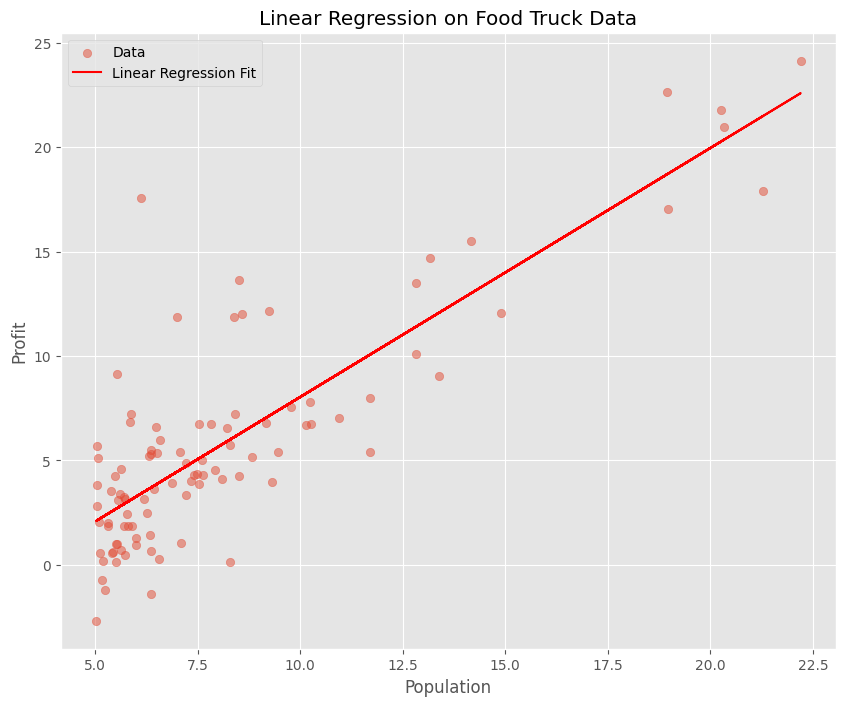

Linear Regression MSE: 8.953942751950358
Lasso Regression MSE: 8.954617442633158
Ridge Regression MSE: 8.953942853998761


In [ ]:
import pandas as pd

df = pd.read_csv("/ex1data1.csv")
df.head()

X = df[['city_population']].values
y = df['food_truck_profit'].values
lin_reg = LinearRegression().fit(X, y)
lasso_reg = Lasso(alpha=0.1).fit(X, y)
ridge_reg = Ridge(alpha=0.1).fit(X, y)
y_pred_lin = lin_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)
mse_lasso = mean_squared_error(y, y_pred_lasso)
mse_ridge = mean_squared_error(y, y_pred_ridge)
plt.scatter(X, y, label="Data", alpha=0.5)
plt.plot(X, y_pred_lin, color='red', label="Linear Regression Fit")
plt.legend()
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear Regression on Food Truck Data")
plt.show()
print(f"Linear Regression MSE: {mse_lin}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Ridge Regression MSE: {mse_ridge}")
